# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача проекта — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучите общую информацию. 

**Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную data. Путь к файлу:**
`/datasets/real_estate_data.csv`

In [1]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')

**Выводим первые 5 строчек датафрейма data на экран**

In [3]:
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Данные склеились в одну строку. Выполним разбивку по колонкам. Разделителем является символ: `\t`

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

**Выводим первые 15 строчек датафрейма data на экран**

In [5]:
pd.set_option('display.max_columns', None)
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Выведим основную информацию о датафрейме с помощью метода info().**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца. 

Описание столбцов:
- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **balcony** — число балконов
- **ceiling_height** — высота потолков (м)
- **cityCenters_nearest** — расстояние до центра города (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
- **first_day_exposition** — дата публикации
- **floor** — этаж
- **floors_total** — всего этажей в доме
- **is_apartment** — апартаменты (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **last_price** — цена на момент снятия с публикации
- **living_area** — жилая площадь в квадратных метрах (м²)
- **locality_name** — название населённого пункта
- **open_plan** — свободная планировка (булев тип)
- **parks_around3000** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around3000** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **rooms** — число комнат
- **studio** — квартира-студия (булев тип)
- **total_area** — общая площадь квартиры в квадратных метрах (м²)
- **total_images** — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Также некоторые столбцы не соответсвуют своему заявленному типу данных.

Так столбец **is_apartment** должен хранить данные в `bool` по исходному условию. 

Следующие столбцы в дальнейшем необходимо будет перевесети в тип данных `int64`: 
- **balcony** 
- **floors_total** 
- **parks_around3000**
- **ponds_around3000** 
- **days_exposition** 

Так как кол-во балконов, всего этаж, кол-во парков, кол-во водоемов, и кол-во дней не может быть дробным значением.

А **first_day_exposition** перевести в `datetime64`

Также некоторые столбцы записаны не в хорошем стиле. Выведим все столбцы.

In [7]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Необходимо скорректировать наименования у столбцов: **cityCenters_nearest**, **parks_around3000**, **ponds_around3000**

In [8]:
# переименование столбцов
data = data.rename(
    columns={
    'cityCenters_nearest': 'city_centers_nearest',
       'parks_around3000': 'parks_around_3000',
       'ponds_around3000': 'ponds_around_3000'
    }
)

In [9]:
# проверка результатов - перечень названий столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Построение общей гистограммы для всех числовых столбцов таблицы**

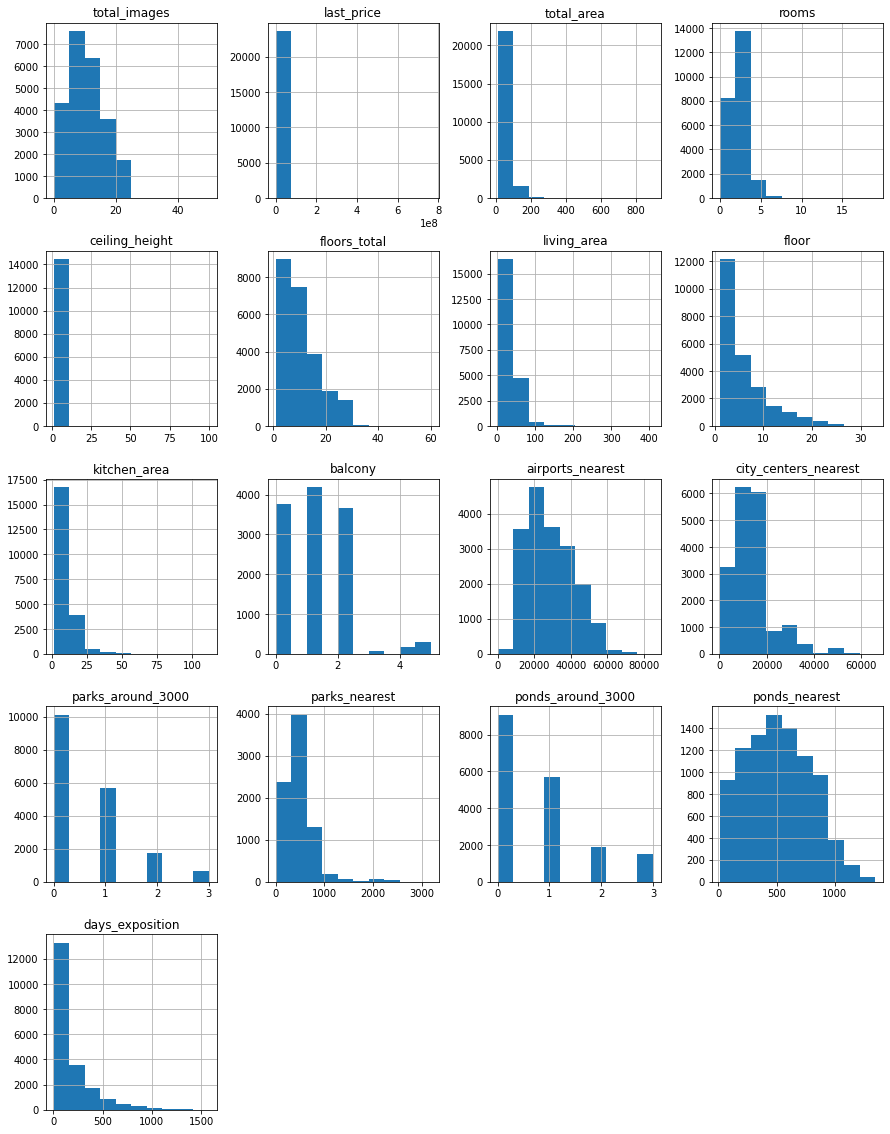

In [10]:
data.hist(figsize=(15, 20));

По представленным гистограмма наблюдаются возможные аномалии по значениям в столбцах: 
- ceiling_height - наблюдаеется один большой пик, но при этом шкала по оси х доходит до знаечния 100
- last_price - наблюдаеется один большой пик, но при этом шкала по оси х доходит до знаечния 8
- total_area - наблюдаются возможные случайные размеры помещений более 200, что для наших исследований может не представлять значение.
- kitchen_area  - наблюдаются возможные случайные размеры помещений более 75, что для наших исследований может не представлять значение.
- living_area - наблюдаются возможные случайные размеры помещений более 200, что для наших исследований может не представлять значение.


Вывод: 
Данным требуется предобработка. Необходимо некоторые столбцы перевести в нужный тип данных. Наблюдается несостыковка с количеством строк в некоторых столбцах, следовательно данные в них отсутсвуют. Необходимо данные также будет проверить на дубликаты. И провести анализ данных в столбцах с целью того, чтобы убедиться, что отсутсвуют в них аномалии. Также названия некоторых столбцов не написаны в хорошем стиле.

### Предобработка данных

1.	Найдите и изучите пропущенные значения в столбцах:
- Определите, в каких столбцах есть пропуски.
- Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.
- В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.
2.	Рассмотрите типы данных в каждом столбце:
- Найдите столбцы, в которых нужно изменить тип данных.
- Преобразуйте тип данных в выбранных столбцах.
- В ячейке с типом markdown поясните, почему нужно изменить тип данных.
3.	Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.
4.	Найдите и устраните редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.
- Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.
- В противном случае удалите редкие и выбивающиеся значения.
- В ячейке с типом markdown опишите, какие особенности в данных вы обнаружили.


### Устранение пропусков

Выведим количество пропущенных значений для каждого столбца. 

In [11]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Рассчитаем в процентном соотношение какую часть эти пропуски составляют от всех строк.

In [12]:
data_nan_count =  (
    pd.DataFrame(
        data.isna().sum()
        .sort_values(ascending=False) 
        .reset_index())
)

In [13]:
#Переименование столбцов
data_nan_count.columns = ['name_column','nan_count']

Проведем расчет в каком процентном соотношение пропуски составляют от всех строк

In [14]:
#Создадим новый столбец 'nan_%' 
data_nan_count['nan_%'] = (data_nan_count['nan_count']/len(data))*100

In [15]:
#Вывод столбцов в которых присутствуют пропуски
data_nan_count[data_nan_count['nan_count'] > 0]

,name_column,nan_count,nan_%
0,is_apartment,20924,88.290645
1,parks_nearest,15620,65.909954
2,ponds_nearest,14589,61.559559
3,balcony,11519,48.605426
4,ceiling_height,9195,38.799105
5,airports_nearest,5542,23.384953
6,city_centers_nearest,5519,23.287902
7,ponds_around_3000,5518,23.283683
8,parks_around_3000,5518,23.283683
9,days_exposition,3181,13.422507


Наибольшее кол-во пропусков в столбце **is_apartment**. Более 88%. Однако данные из этого столбца нам не нужны для исследования в данном проекте, поэтому пустые строки можно заполнить любым значением. 
Природа же данных пропуков возможна в том, что все представленные квартиры не являются "апартаментами" и при внесении данных не стали это указывать.

Вычислим сколько строк с информацией, что квартиры являются апартаментами.

In [16]:
len(data[data['is_apartment'] == True])

50

Вычислим сколько строк с информацией, что квартиры не являются апартаментами.

In [17]:
len(data[data['is_apartment'] == False])

2725

Как можно наблюдать по большей части указывали, что квартиры не являются апартаментами. Но поспешные выводы делать не будем. Зафиксируем, что значения пропущены и в итоговом отчете укажем на данный столбец, чтобы перепроверили информацию.

Заполним пока что в столбце **is_apartment** пустые строки значение "False", чтобы столбец соответствовал заданному типу данных по условию, но создадим столбец **is_apartment_missing** в котором указжем было ли нам известно значение. Там где была пустая строка напишем "Unknown", а где были значения укажем "Known". 

Так как такие столбцы с фиксациией какие значения были пропущены возможно будем создавать и для других столбцов, то создадим функцию.

In [18]:
def missing(column_in,column_out):
# сохраним в переменную индексы в которых отсутсвуют пропуски
    index_0 = (
    data.loc[data[column_in].isna() == False].index
)
    # Создадим  столбец "is_apartment_missing" и заполним его
    data.loc[index_0,column_out] = 'Known'
    data[column_out] = data[column_out].fillna('Unknown')
    
    return data[column_out]
        

In [19]:
missing('is_apartment','is_apartment_missing');

In [20]:
# Заполним пропуски
data['is_apartment'] = data['is_apartment'].fillna(False)

In [21]:
#Выведим первые 15 строк таблицы
data.loc[:,['is_apartment','is_apartment_missing']].head(15)

,is_apartment,is_apartment_missing
0,False,Unknown
1,False,Unknown
2,False,Unknown
3,False,Unknown
4,False,Unknown
5,False,Unknown
6,False,Unknown
7,False,Unknown
8,False,Unknown
9,False,Unknown


In [22]:
# подсчёт пропусков и сортировка по убыванию пропусков

data.isna().sum().sort_values(ascending=False)

parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
open_plan                   0
last_price                  0
studio                      0
is_apartment                0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
is_apartment_missing        0
dtype: int64

Также нам не требуются для дальнейшего анализа значения в столбцах **ponds_nearest** (66% пропусков) и **balcony** (49% пропусков). Пропуски в **ponds_nearest**  вероятней всего означают, что водоемов поблизости нет и при составлении объявления данный пункт не заполнялся. С балконами есть предположение, что они тоже отсутсвуют в квартире и при составление их просто также не указывали.

В итоге:
Можем заполнить пустые строки в столбце **ponds_nearest**  значением -1 или 'outside' или 'unknown'.
А в **balcony** значением 0 или 'unknown'. 

Но прежде чем заполнять строки в столбце **ponds_nearest** проверим какое значение в столбце **ponds_around_3000**. Ведь если водоемов поблизости нет, то значение в них равно 0. Поэтому прежде проверим данный момент.

И так как значений пропущенных достаточно много (50-60%) и мы делаем предположение, то создадим столбцы **ponds_nearest_missing** и **balcony_missing** в которых будем указывать какие значения знали, а какие нет, чтобы те кто выгружал данные потом перепроверили информацию.

In [23]:
missing('balcony','balcony_missing');
missing('ponds_nearest','ponds_nearest_missing');

In [24]:
# Заполним пустые строки 0 в столбце 'balcony'
data['balcony'] = data['balcony'].fillna(0)

In [25]:
#Выведим первые 5 строк таблицы 
data.loc[:,['balcony','balcony_missing']].head(5)

,balcony,balcony_missing
0,0.0,Unknown
1,2.0,Known
2,0.0,Known
3,0.0,Known
4,0.0,Unknown


In [26]:
#заполним пустые строки в столбце 'ponds_nearest' 
#с учетом значений в 'ponds_around_3000'

data.loc[data['ponds_around_3000'] == 0, 'ponds_nearest'] = -1

#data.head(5)

In [27]:
# подсчёт пропусков и сортировка по убыванию пропусков

data.isna().sum().sort_values(ascending=False)

parks_nearest            15620
ceiling_height            9195
airports_nearest          5542
city_centers_nearest      5519
ponds_nearest             5518
ponds_around_3000         5518
parks_around_3000         5518
days_exposition           3181
kitchen_area              2278
living_area               1903
floors_total                86
locality_name               49
balcony_missing              0
is_apartment_missing         0
total_images                 0
balcony                      0
last_price                   0
open_plan                    0
studio                       0
is_apartment                 0
floor                        0
rooms                        0
first_day_exposition         0
total_area                   0
ponds_nearest_missing        0
dtype: int64

Оставшиеся столбцы с пропусками нам понадобятся в дальнейших иследованиях. Попробуем выяснить причину эту пропусков и по возможности их устранить.

В **parks_nearest** около 66% пропущенных строк. Достаточно большое кол-во. Вероятно причина такая-же, как и с водоемами. Вероятно рядом с квартирами парков нет. 

Попробуем часть пропусков в **parks_nearest** восстановить с учетом значений в столбце **parks_around_3000**. Так если парков поблизости в радусе 3км нет, то значение будет 0 и следовательно можно сразу указать знаечние -1 или 'outside', а если есть то укажем медианное расстоние в зависимости от населенная пункта. 

In [28]:
#сохраним информацию об пропущенных строках
missing('parks_nearest','parks_nearest_missing');

In [29]:
#заполним пустые строки
data.loc[data['parks_around_3000'] == 0, 'parks_nearest'] = -1
#data.head(5)

In [30]:
# подсчёт пропусков и сортировка по убыванию пропусков

data.isna().sum().sort_values(ascending=False)

ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_nearest            5518
ponds_around_3000        5518
parks_nearest            5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
ponds_nearest_missing       0
balcony_missing             0
is_apartment_missing        0
balcony                     0
last_price                  0
open_plan                   0
studio                      0
is_apartment                0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
parks_nearest_missing       0
dtype: int64

Можно заметить , что кол-во пропусков в столбцах **parks_around_3000**, **ponds_around_3000**, **city_centers_nearest**, **airports_nearest**, **parks_nearest** и **ponds_nearest** практически одинаковое. Точно наблюдается одинаковое кол-во пропусков **parks_around_3000**, **parks_around_3000**, **parks_nearest** и **ponds_nearest** в кол-ве 5518. Проверим есть ли пропуски в тех же строках, но в других расссматриваемых столбцах одновременно

In [31]:
i=0
index = []
k = data.isna()
for p in range(0,len(data)):
    if k.loc[p,'parks_around_3000'] \
     & k.loc[p,'ponds_around_3000'] \
     & k.loc[p,'city_centers_nearest']\
     & k.loc[p,'airports_nearest']\
     & k.loc[p,'parks_nearest'] \
     & k.loc[p,'ponds_nearest']:
        i += 1
        index.append(p)
print(i)

5518


Итого вышло 5518 строк с одинаковым пропуском в в столбцах **parks_around_3000**, **ponds_around_3000**, **city_centers_nearest**, **airports_nearest**, **parks_nearest** и **ponds_nearest**. Значит можно предположить, что квартиры в населенных пунктах располагаются дальше рассматриваемых параметров и вероятно значения в этих строках не стали заполнять.

Заполним пропущенные строки следующими значениями:
- **parks_around_3000** - 0
- **ponds_around_3000** - 0
- **parks_nearest** - -1
- **ponds_nearest** - -1
- **city_centers_nearest** - -1
- **airports_nearest** - -1



Так как мы значения целенаправленно в столбцах зануляем, то сохранием в столбцы  **parks_around_3000_missing**, **ponds_around_3000_missing**, **city_centers_nearest_missing**, **airports_nearest_missing**  информацию о том какие знаечения были изначально пропущены, а какие нет.

In [32]:
missing('parks_around_3000','parks_around_3000_missing')
missing('ponds_around_3000','ponds_around_3000_missing')
missing('city_centers_nearest','city_centers_nearest_missing')
missing('airports_nearest','airports_nearest_missing');

In [33]:
# Заполним пустые строки 
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

In [34]:
# Заполним пустые строки 
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

In [35]:
# Заполним пустые строки 
data['parks_nearest'] = data['parks_nearest'].fillna(-1)

In [36]:
# Заполним пустые строки 
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)

In [37]:
# Заполним пустые строки 
data.loc[index,'city_centers_nearest'] = -1


In [38]:
# Заполним пустые строки 
data.loc[index,'airports_nearest'] = -1


In [39]:
#Выведим первые 10 строк таблицы
(
    data.loc[:,['parks_around_3000',
                 'parks_around_3000_missing',
                 'ponds_around_3000',
                 'ponds_around_3000_missing',
                 'city_centers_nearest',
                 'city_centers_nearest_missing',
                 'airports_nearest',
                 'airports_nearest_missing']].head(10)
)

,parks_around_3000,parks_around_3000_missing,ponds_around_3000,ponds_around_3000_missing,city_centers_nearest,city_centers_nearest_missing,airports_nearest,airports_nearest_missing
0,1.0,Known,2.0,Known,16028.0,Known,18863.0,Known
1,0.0,Known,0.0,Known,18603.0,Known,12817.0,Known
2,1.0,Known,2.0,Known,13933.0,Known,21741.0,Known
3,2.0,Known,3.0,Known,6800.0,Known,28098.0,Known
4,2.0,Known,1.0,Known,8098.0,Known,31856.0,Known
5,0.0,Unknown,0.0,Unknown,-1.0,Unknown,-1.0,Unknown
6,0.0,Known,0.0,Known,19143.0,Known,52996.0,Known
7,0.0,Known,0.0,Known,11634.0,Known,23982.0,Known
8,0.0,Unknown,0.0,Unknown,-1.0,Unknown,-1.0,Unknown
9,0.0,Known,0.0,Known,15008.0,Known,50898.0,Known


In [40]:
# подсчёт пропусков и сортировка по убыванию пропусков

data.isna().sum().sort_values(ascending=False)

ceiling_height                  9195
days_exposition                 3181
kitchen_area                    2278
living_area                     1903
floors_total                      86
locality_name                     49
airports_nearest                  24
city_centers_nearest               1
is_apartment_missing               0
ponds_nearest                      0
ponds_nearest_missing              0
balcony_missing                    0
parks_nearest                      0
parks_nearest_missing              0
parks_around_3000_missing          0
ponds_around_3000_missing          0
city_centers_nearest_missing       0
ponds_around_3000                  0
total_images                       0
parks_around_3000                  0
last_price                         0
balcony                            0
open_plan                          0
studio                             0
is_apartment                       0
floor                              0
rooms                              0
f

 В суммме количество пропусков в **locality_name** и **floors_total**составляет менее 0,6% от общего числа строк. Следовательно, если мы их удалим, то данное действие не особо повлияет на дальнейший анализ. Плюс восстановить данные, к примеру,  в **locality_name** не представляет возможности, так как здесь отображается название населенного пункта. Если необходимо тогда было оставить значения, то заполняли бы пропуски "Unknown". В значение **floors_total** можно было бы заполнить либо случайным значением из заданного дипазаона или вычислить медианной значение отталкиваясь к примеру от рассматриваемого населенного пункта по всем домам. Последнее решение касается и столбцов **city_centers_nearest** и **airports_nearest**. Но так как пустых строк в них еще меньше, то их тоже просто удалим.

In [41]:
# удалим строки с пропусками в столбцах 

data = (
    data.dropna(subset=['locality_name',
                        'floors_total',
                        'city_centers_nearest',
                        'airports_nearest'])
)

In [42]:
#создание новые индексы и удаленим старые
data = data.reset_index() 

In [43]:
# подсчёт пропусков и сортировка по убыванию пропусков

data.isna().sum().sort_values(ascending=False)

ceiling_height                  9081
days_exposition                 3168
kitchen_area                    2220
living_area                     1863
balcony_missing                    0
parks_nearest                      0
ponds_around_3000                  0
ponds_nearest                      0
is_apartment_missing               0
index                              0
city_centers_nearest               0
ponds_nearest_missing              0
parks_nearest_missing              0
parks_around_3000_missing          0
ponds_around_3000_missing          0
city_centers_nearest_missing       0
parks_around_3000                  0
locality_name                      0
airports_nearest                   0
total_images                       0
balcony                            0
open_plan                          0
studio                             0
is_apartment                       0
floor                              0
floors_total                       0
rooms                              0
f

На возникновенния пустых строк в оставшихся столбах мог повлиять человеческий фактор, к примеру, если человек ошибся при вводе или не знал какие указывать данные или забыл их указать.
Причину пропуска с столбцом **days_exposition** можно было предположить, что значений нет, так как данные квартиры просто еще не были проданы на момент выгрузки датасета, но тогда были бы и пусты строки в столбцах c последней ценой на момент продажи (**last_price**), что свидетельствовало о продаже квартиры. Но в данном столбце пустых строк не было изначально, поэтому скорее всего данные просто не внесли или потеряны. Также возможно квартира была продана в тот же день и не стали указывать длительность продажи, хотя формально должны били указать, что продажа длилась 1 день, если продали в этот же день.


In [44]:
#диаграмма размах значений столбца days_exposition
data['days_exposition'].describe()

count    20372.000000
mean       180.705674
std        219.632473
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Как можем наблюдать разброс очень большой.Аномалии пока не наблюдаются, действительно было возможно, что интересующие нас квартиры в исследовании могли продаваться до 5 лет. Это необыяно, но все могло завистеть от их месторасположения
Посчитаем, кол-во квартир проданных за 1 день.

In [45]:
len(data[data['days_exposition'] == 1])

1

Пустые строки в столбцах **ceiling_height**, **kitchen_area**, **living_area**  будем устранять заполнением медианным значением на случай если окажутся в них аномальные значения, которые будем изучать и устранять позже.

Интересно проанализировать как кол-во пропусков менялось у разных столбцов от кол-ва всех заявлений с годами и оценить наскока пропуски были случайны. Этот момент сделаем позже когда введем столбец с годами формирования объявления.

In [46]:
#сохраним информацию об пропущенных строках
missing('ceiling_height','ceiling_height_missing');
missing('days_exposition','days_exposition_missing');
missing('kitchen_area','kitchen_area_missing');
missing('living_area','living_area_missing');

Заполним пустые строки медианным значением среди всех квартир, так как высота потолков в оснвоном во всех квартирах у всех более менее одинаковы.

In [47]:
#Заполним пустые строки медианным значением 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Заполним пустые строки медианным значением среди квартир в зависимости от кол-ва комнат в ней. Так как обычно чем больше площадь, тем больше жилая плоадь и кухня.

In [48]:
#Заполним пустые строки медианным значением в kitchen_area
for i in data['rooms'].sort_values().unique():
    data['kitchen_area'] = (
        data['kitchen_area'].fillna(
            data.loc[data['rooms'] == i, 'kitchen_area'].median()
        )
    )

In [49]:
#Заполним пустые строки медианным значением в living_area
for i in data['rooms'].sort_values().unique():
    data['living_area'] = (
        data['living_area'].fillna(
            data.loc[data['rooms'] == i, 'living_area'].median()
        )
    )

Длительность объявления (**days_exposition**) сложнее заполнить, так как вероятней всего сразу несколько факторов влияло на скорость продажи квартиры и необходимо проводить анализ. поэтому заполним пустые строки значением -1

In [50]:
data['days_exposition'] = data['days_exposition'].fillna(-1)

In [51]:
# подсчёт пропусков и сортировка по убыванию пропусков

#data.isna().sum().sort_values(ascending=False)

**Изменение типов данных в столбцах**

Cтолбцы в дальнейшем необходимо будет перевесети в тип данных `int64`: 
- **balcony** 
- **floors_total** 
- **parks_around_3000**
- **ponds_around_3000** 
- **days_exposition** 

In [52]:
data = data.astype({ "balcony": "int64", "floors_total": "int64"})

In [53]:
w = ['parks_around_3000','ponds_around_3000','days_exposition']
for i in w:
    data[i] = data[i].astype('int64')

Переведем значения в столбце **first_day_exposition** в `datetime64`. Данное действие необходимо, чтобы потом можно было работать с датой.

In [54]:
data['first_day_exposition'] = (pd.
                                to_datetime(
                                    data['first_day_exposition'],
                                    format='%Y-%m-%dT%H:%M:%S')
                               )

In [55]:
#выведим информацию по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23540 entries, 0 to 23539
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   index                         23540 non-null  int64         
 1   total_images                  23540 non-null  int64         
 2   last_price                    23540 non-null  float64       
 3   total_area                    23540 non-null  float64       
 4   first_day_exposition          23540 non-null  datetime64[ns]
 5   rooms                         23540 non-null  int64         
 6   ceiling_height                23540 non-null  float64       
 7   floors_total                  23540 non-null  int64         
 8   living_area                   23540 non-null  float64       
 9   floor                         23540 non-null  int64         
 10  is_apartment                  23540 non-null  bool          
 11  studio                      

In [56]:
data.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,is_apartment_missing,balcony_missing,ponds_nearest_missing,parks_nearest_missing,parks_around_3000_missing,ponds_around_3000_missing,city_centers_nearest_missing,airports_nearest_missing,ceiling_height_missing,days_exposition_missing,kitchen_area_missing,living_area_missing
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-1,Unknown,Unknown,Known,Known,Known,Known,Known,Known,Known,Unknown,Known,Known
1,1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,-1.0,0,-1.0,81,Unknown,Known,Unknown,Unknown,Known,Known,Known,Known,Unknown,Known,Known,Known
2,2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,Unknown,Known,Known,Known,Known,Known,Known,Known,Unknown,Known,Known,Known
3,3,0,64900000.0,159.0,2015-07-24,3,2.65,14,18.0,9,False,False,False,9.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,Unknown,Known,Known,Known,Known,Known,Known,Known,Unknown,Known,Unknown,Unknown
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,Unknown,Unknown,Known,Known,Known,Known,Known,Known,Known,Known,Known,Known


**Нахождение уникальных значений в столбцах с названиями и устранение неявных дубликатов.**

Проверим есть ли в данных уникальные дубликаты.

In [57]:
data.duplicated().sum()

0

Явные дубликатов нет

Выведим уникальные значения столбца **locality_name**

In [58]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [59]:
row = ['городской поселок',
       'городской посёлок',
       'поселок',
       'коттеджный поселок',
       'поселок городского типа',
       'посёлок городского типа',
      'посёлок при железнодорожной станции',
       'поселок при железнодорожной',
      'поселок станции']

# Устранение неявных дубликатов
for i in row:
    data['locality_name'] = data['locality_name'].str.replace(i, 'посёлок')

In [60]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [61]:
data['locality_name'] = (
    data['locality_name'].str.
    replace('садоводческое некоммерческое товарищество',
            'садовое товарищество')
)

In [62]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Создам функцию, которая на основании данных из столбца `locality_name` сформирует новый столбец `locality_category`, в который войдут следующие категории:**

- `'посёлок'`,
- `'село'`,
- `'деревня'`,
- `'садовое товарищество'`
- `'город'`.

**Например, если в столбце `locality_name` находится подстрока `'Санкт-Петербург'`, то в столбце `locality_category` должна появиться строка `'город'`.**


In [63]:
def categorize_locality(row):
    if 'село' in row:
        return 'село'
    elif 'посёлок' in row:
        return 'посёлок'
    elif 'садовое' in row:
        return 'садовое товарищество'
    elif 'деревня' in row:
        return 'деревня'
    else:
        return 'город'

In [64]:
data['locality_category'] = data['locality_name'].apply(categorize_locality)

In [65]:
#выведим первые 5 строк
data.loc[:,['locality_name','locality_category']].head()

,locality_name,locality_category
0,Санкт-Петербург,город
1,посёлок Шушары,посёлок
2,Санкт-Петербург,город
3,Санкт-Петербург,город
4,Санкт-Петербург,город


Устранив неявные дубликаты проверим не появились ли уникальные

In [66]:
data.duplicated().sum()

0

дубликатов не появилось

**Найдем и устраним редкие и выбивающиеся значения в каждых столбцах**

Проанализируем значения в столбцах и посмотрим присутствуют ли аномалии в них прежде чем будем их заполнять.

**Начнем с столбца ceiling_height**

In [67]:
#импортируем библиотеку
import matplotlib.pyplot as plt

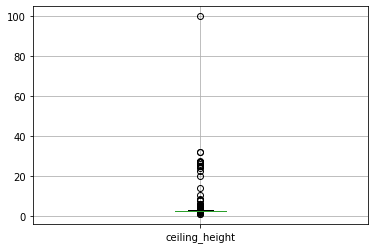

In [68]:
#Построим диаграмму размаха
pd.DataFrame(data['ceiling_height']).boxplot();

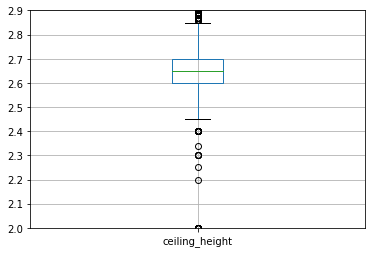

In [69]:
pd.DataFrame(data['ceiling_height']).boxplot()
plt.ylim(2,2.9);

In [70]:
data['ceiling_height'].describe()

count    23540.000000
mean         2.724263
std          0.991328
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Как можем наблюдать по диагармме размаха, что в объявлении в основном встречаются квартиры с высотой потолков в 2.7м, но наблюдаются аномальные значения, к примеру, в размере 1м и 100м. Веротно всего ошибки возникли при заполнении данных. Минимальная высота потолков в у нас в стране 2.4м в жилых помещениях. Попробуем устранить часть искажений.

In [71]:
#Выведим уникальные значения данного столбца
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Из столбца с уникальными значениями можно предположить, что все значения написанные потолков с 22.6 м и выше написаны с ошибкой и вероятно пользователь поставли запятую не в том месте. Для корректировки поделим значения на 10.

In [72]:
data.loc[data['ceiling_height'] >= 22.6,'ceiling_height'] = (
    data.loc[data['ceiling_height'] >= 22.6,'ceiling_height'] /10
)

In [73]:
#data['ceiling_height'].sort_values().unique()

Для дальнейшего анализа исключим аномальные квартиры с высотой потолка ниже 2.4 м и  предположим выше 5м. Посчитаем сколько таких строк в данных.

In [74]:
(
    data.
    loc[(data['ceiling_height'] > 5) | (data['ceiling_height'] < 2.4),
        'ceiling_height'].count()
)

37

Всего строк 37. Для дальнейшего анализа данный строки можно удлаить, так как их не значительное кол-во.

In [75]:
data = data.loc[(data['ceiling_height'] <= 5) |\
                (data['ceiling_height'] >= 2.4),
                'total_images':'locality_category']

In [76]:
data['ceiling_height'].describe()

count    23540.000000
mean         2.699217
std          0.276826
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

Среднее отклоненение уменьшилось до 0,27.

**Изучим аномалии в kitchen_area и living_area и total_area**

In [77]:
data.loc[:,['kitchen_area','living_area','total_area']].describe()

,kitchen_area,living_area,total_area
count,23540.000000,23540.000000,23540.000000
mean,10.409758,33.118489,60.265686
std,5.629247,21.434313,35.409982
min,1.300000,2.000000,12.000000
25%,7.300000,18.000000,40.000000
50%,9.000000,29.000000,52.000000
75%,11.400000,41.100000,69.632500
max,112.000000,409.700000,900.000000


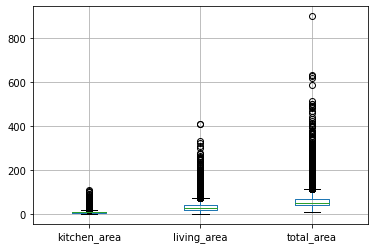

In [78]:
#Построим диаграмму размаха
pd.DataFrame(data.loc[:,['kitchen_area','living_area','total_area']]).boxplot();

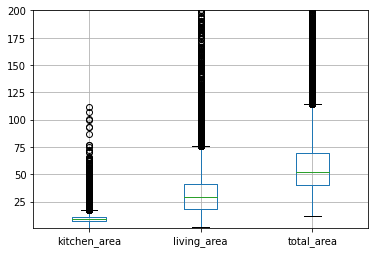

In [79]:
pd.DataFrame(data.loc[:,['kitchen_area','living_area','total_area']]).boxplot();
plt.ylim(1,200);

Сформируем сводную таблицу по кол-ву заявок и среднему и медианному значению площадей в списке в зависимости сколько комнат в квартире

In [80]:

data_pivot = data.pivot_table(
    index = 'rooms', 
    values = ['kitchen_area','living_area','total_area'],
    aggfunc = ['mean','median','count'])

In [81]:
data_pivot = data_pivot.reset_index()
data_pivot

rooms         mean                               median              \
         kitchen_area living_area  total_area kitchen_area living_area   
0      0     9.000000   18.816186   29.321701         9.00      18.000   
1      1     9.488140   17.906560   37.630104         9.00      18.000   
2      2     9.888149   30.620845   55.799417         9.00      30.000   
3      3    11.121961   45.110577   77.669227         9.00      44.000   
4      4    13.296026   63.293487  107.536197        10.50      61.750   
5      5    17.127407   91.034568  160.450895        14.40      89.350   
6      6    20.167596  125.234423  202.571635        18.85     122.635   
7      7    20.377586  145.334483  261.365517        17.90     139.050   
8      8    20.900000  168.683333  259.233333        23.10     161.000   
9      9    23.062500  168.725000  305.975000        13.75     169.900   
10    10    22.866667  165.566667  259.566667        19.80     161.400   
11    11    12.600000  133.900000  188.900000        12.60     133.900   
12    12   112.000000  409.700000  900.000000       112.00     409.700   
13    14    21.250000  195.150000  304.200000        21.25     195.150   
14    15   100.000000  409.000000  590.000000       100.00     409.000   
15    16    13.000000  180.000000  270.000000        13.00     180.000   
16    19    27.600000  264.500000  374.600000        27.60     264.500   

                     count                         
   total_area kitchen_area living_area total_area  
0      26.075          194         194        194  
1      36.560         7999        7999       7999  
2      53.000         7887        7887       7887  
3      72.800         5773        5773       5773  
4      99.300         1170        1170       1170  
5     145.700          324         324        324  
6     186.150          104         104        104  
7     213.500           58          58         58  
8     235.700           12          12         12  
9     300.950            8           8          8  
10    272.600            3           3          3  
11    188.900            2           2          2  
12    900.000            1           1          1  
13    304.200            2           2          2  
14    590.000            1           1          1  
15    270.000            1           1          1  
16    374.600            1           1          1

Визаулизируем данные в виде тепловых графиков

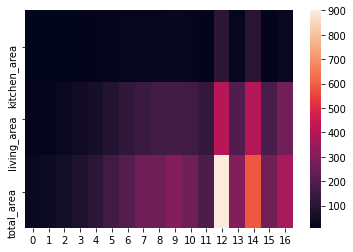

In [82]:
import seaborn as sns
import numpy as np

sns.heatmap(data_pivot['mean'].T);

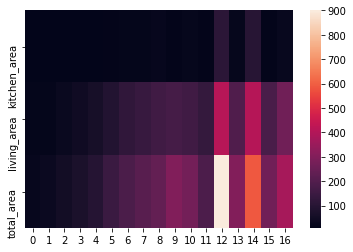

In [83]:
sns.heatmap(data_pivot['median'].T);

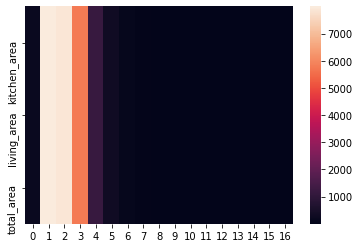

In [84]:
sns.heatmap(data_pivot['count'].T);

По графикам и диаграмме размаха можно сделать выводы, что активно встречаются аномалии по площади в квартирах в которых больше 5 комнат, что веротно логично, но такие квартиры в своей массе не представляют интерес и являются единичными случаями и их удаление не приведет к большим искажеиям в данных. ТАкже основная Масса заявок приходится на 1,2,3 и 4 комнатыне квартиры

In [85]:
#удалим не нужные строки 
data = data.loc[(data['rooms'] <= 5)].reset_index()

In [86]:
#data.head()

Вычислим сколько отсалось строк в данных

In [87]:
len(data)

23347

Всего было 
Значит у нас осталось (23347/23699) * 100% = 98,5% данных от изначальных. Следовательно было потеряно менее 2%, что приемлимо для наших исследовоаний

### Посчитаем и добавим в таблицу новые столбцы

Добавим в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра;

In [88]:
#Переведем цену в млн
data['last_price'] = data['last_price']/1000000

In [89]:
data['price_m2'] = data['last_price']/data['total_area']  
#data.head()

- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [90]:
data['weekday'] = data['first_day_exposition'].dt.weekday
#data.head()

- месяц публикации объявления;
- год публикации объявления;

In [91]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
#data.head()

In [92]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
#data.head()

- тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [93]:
p =[]
for i in range(len(data)):
    if data.loc[i,'floor'] == 1:
        p.append('первый')
    elif data.loc[i,'floor'] == data.loc[i,'floors_total']:
        p.append('последний') 
    else:
        p.append('другой')

data['floor_category'] = p
#data.head()

- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [94]:
data['city_centers_nearest'] = data['city_centers_nearest']/1000
data['city_centers_nearest'] = data['city_centers_nearest'].astype('int64')
#data.head()

**Получив столбец с годами можно закончить анализ как изменялись с годами кол-во заявлений с пропущенными значениями.**

**Построим график изменения кол-во заявок в разных годах с с пропущенным и не пропущенным значением в столбцах: ceiling_height,living_area и kitchen_area**

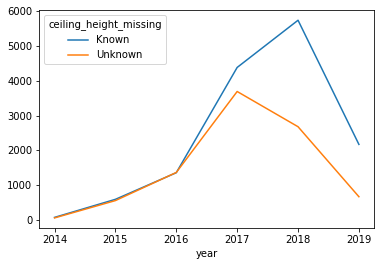

In [95]:
ceiling_height_pivot = data.pivot_table(
    index = 'year', 
    columns = 'ceiling_height_missing',
    values = 'ceiling_height',
    aggfunc = 'count')
#ceiling_height_pivot
ceiling_height_pivot.plot();

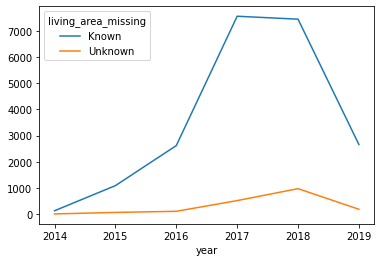

In [96]:
living_area_pivot = data.pivot_table(
    index = 'year', 
    columns = 'living_area_missing',
    values = 'living_area',
    aggfunc = 'count')
#ceiling_height_pivot
living_area_pivot.plot();

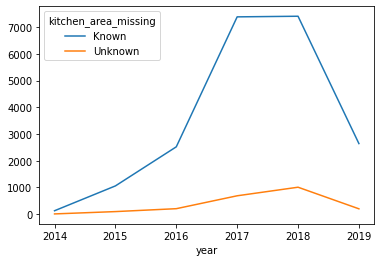

In [97]:
kitchen_area_pivot = data.pivot_table(
    index = 'year', 
    columns = 'kitchen_area_missing',
    values = 'kitchen_area',
    aggfunc = 'count')
#ceiling_height_pivot
kitchen_area_pivot.plot();

В рассмотренных графиках никаких аномалий не наблюдается по пропускам. Все закономерно и объяснено ранее.

**Построим график изменения кол-во заявок в разных годах с с пропущенным и не пропущенным значением в столбце days_exposition**

In [98]:
days_exposition_table = (
    data.pivot_table(
    index = 'year', 
    columns = 'days_exposition_missing',
    values = 'days_exposition',
    aggfunc = ['count'])
)
days_exposition_table

count        
days_exposition_missing Known Unknown
year                                 
2014                      117      18
2015                     1083      69
2016                     2659      66
2017                     7815     260
2018                     7486     933
2019                     1076    1765

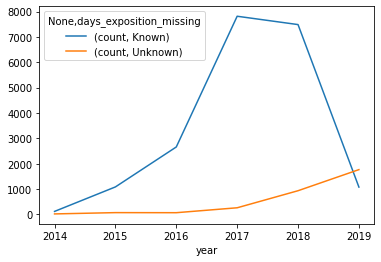

In [99]:
days_exposition_table.plot();

По графику можно наблюдать, что пропуски фиксированно растут не смотря на то,что кол-во заявок уменьшается. Достаточно важная аномалия. Основной рост пропусков начался с 2017 года, но в 2019 кол-во пропусков стало преобладать. А так как кол-во пропущенных значений до этого  было незначительное, то предположение, что возникла техническая ошибка влияющая на потерю данных.

Посомтрим последнюю дату публикации

In [100]:
data['first_day_exposition'].sort_values(ascending=False).unique()

array(['2019-05-03T00:00:00.000000000', '2019-05-02T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', ...,
       '2014-12-04T00:00:00.000000000', '2014-11-29T00:00:00.000000000',
       '2014-11-27T00:00:00.000000000'], dtype='datetime64[ns]')

Построим сводную таблицы по кол-во заявок с известными данными по 2019 году в зависисти от ко-ва комнат в квартире и отдельно в зависимости от типа населения

In [101]:
(
    data[data['year'] == 2019]
    .pivot_table(
        index =  ['year','rooms'],
        columns = 'days_exposition_missing',
        values = 'days_exposition',
        aggfunc = 'count')
)

days_exposition_missing  Known  Unknown
year rooms                             
2019 0                       8        9
     1                     416      514
     2                     400      603
     3                     217      520
     4                      26       95
     5                       9       24

Таблица ничего не дала. Посмотрим как потери зависили от типа локации

In [102]:
(
    data[data['year'] == 2019]
    .pivot_table(
                    index = ['year', 'locality_category'],
                    columns = 'days_exposition_missing',
                    values = 'days_exposition',
                    aggfunc = 'count'
    )
)

days_exposition_missing    Known  Unknown
year locality_category                   
2019 город                   964     1545
     деревня                  23       49
     посёлок                  87      169
     садовое товарищество      1        1
     село                      1        1

Тут уже интересно. Пустые строки в оснвоном наблюдаются в городах. 
Таким образом, для исследования лучше отбросить объявления за 2019 год, так как объявлений в них мало по сравнению с другими годами и кол-во пропусков преобладает. При попытке внести медианное значение они могут исказть данные за этот год.  

А оставшиеся значения с -1 заполним медианным по каждому году в зависимости от типа местности.
Посмотрим  сводную таблицу, чтобы оценить как медианное значение зависит от года и метсности

In [103]:
(
    data[(data['year'] != 2019) & (data['days_exposition'] != -1)]
    .pivot_table(
        index =  ['year','locality_category'],
        columns = 'days_exposition_missing',
        values = 'days_exposition',
        aggfunc = 'median')
)

days_exposition_missing     Known
year locality_category           
2014 город                  869.5
     деревня               1078.0
     посёлок               1063.5
2015 город                  581.5
     деревня                605.0
     посёлок                524.0
2016 город                  233.0
     деревня                297.0
     посёлок                211.0
     садовое товарищество    26.0
     село                   421.0
2017 город                  102.0
     деревня                102.0
     посёлок                107.0
     садовое товарищество   307.0
     село                    75.0
2018 город                   64.0
     деревня                 60.0
     посёлок                 62.0
     село                    72.5

В основном знаечение в течение года имеют одинаковое медианное значение, но попадаются и ключения.

Избавимся от строк с 2019 годом, так было принято не включать в данной исслдеование этот год, чтобы не исказил общие данные

In [104]:
data = data.loc[data['year'] != 2019].reset_index()
data.head()

,level_0,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,is_apartment_missing,balcony_missing,ponds_nearest_missing,parks_nearest_missing,parks_around_3000_missing,ponds_around_3000_missing,city_centers_nearest_missing,airports_nearest_missing,ceiling_height_missing,days_exposition_missing,kitchen_area_missing,living_area_missing,locality_category,price_m2,weekday,month,year,floor_category
0,1,1,7,3.350,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18,0,-1.0,0,-1.0,81,Unknown,Known,Unknown,Unknown,Known,Known,Known,Known,Unknown,Known,Known,Known,посёлок,0.082921,1,12,2018,первый
1,2,2,10,5.196,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13,1,90.0,2,574.0,558,Unknown,Known,Known,Known,Known,Known,Known,Known,Unknown,Known,Known,Known,город,0.092786,3,8,2015,другой
2,3,3,0,64.900,159.0,2015-07-24,3,2.65,14,18.0,9,False,False,False,9.0,0,Санкт-Петербург,28098.0,6,2,84.0,3,234.0,424,Unknown,Known,Known,Known,Known,Known,Known,Known,Unknown,Known,Unknown,Unknown,город,0.408176,4,7,2015,другой
3,4,4,2,10.000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8,2,112.0,1,48.0,121,Unknown,Unknown,Known,Known,Known,Known,Known,Known,Known,Known,Known,Known,город,0.100000,1,6,2018,другой
4,5,5,10,2.890,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,посёлок Янино-1,-1.0,0,0,-1.0,0,-1.0,55,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Known,Known,Known,посёлок,0.095066,0,9,2018,другой


Выпоним заполнение через чикл медианных значений в строках где до этого было записано значение -1

In [105]:
for i in data['year'].sort_values().unique():
    for j in data.loc[data['year'] == i,'locality_category'].sort_values().unique():
        data.loc[(data['year'] == i) & \
                 (data['days_exposition'] == -1) & \
                 (data['locality_category'] == j), \
                 'days_exposition']  = (data
                                        .loc[(data['year'] == i) & \
                                             (data['days_exposition'] != -1) &\
                                             (data['locality_category'] == j), \
                                             'days_exposition']
                                        .median()

        )

In [106]:
#Посчет кол-ва строк с значение -1 в days_exposition
#len(data[data['days_exposition'] == -1])

In [107]:
#всего строк оставшихся в датасете
len(data)

20506

**Вывод:**
Всего было 23699 строк.

Значит у нас осталось (20506/23699) * 100% = 86.5 % данных от изначальных. Следовательно было потеряно менее ориентировочно 13,5%. 

Если учитывать, что в основном 10% были пропуски в строках по столбцу **days_exposition** за 2019 и мы приняли решение его исключить из исследования, так как восстановить сложно и восстановление приведет к достаточно сильным искажениям, то с оставшимися значениями можно выполнять исследования.

Также кол-во объявлений в 2019 намного меньше чем в было в вдругие годы и  данные за этот год не полные, так последняя публикация была в 2019-05-03.

В основном причиной всех пропусков является человечечский фактор. К примеру, если человек ошибся при вводе или не знал какие указывать данные или забыл их указать или посчитал, что нет смысла их укзаывать, так как уже указал в соседниз пунктах ответ. Все данные пустоты можно было восстановить.

Выбивались пустые строки в столбце days_exposition, который восстановить полностью не представляет возможности. Было сделано частичное восстановление с учетом удаления строк с 2019 годом публикации.


### Проведем исследовательский анализ данных

**1.	Изучим следующие параметры объектов:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

**Построим отдельные гистограммы для каждого из этих параметров.**

Построение гистрограмм для "общая площадь", "жилая площадь", "площадь кухни"

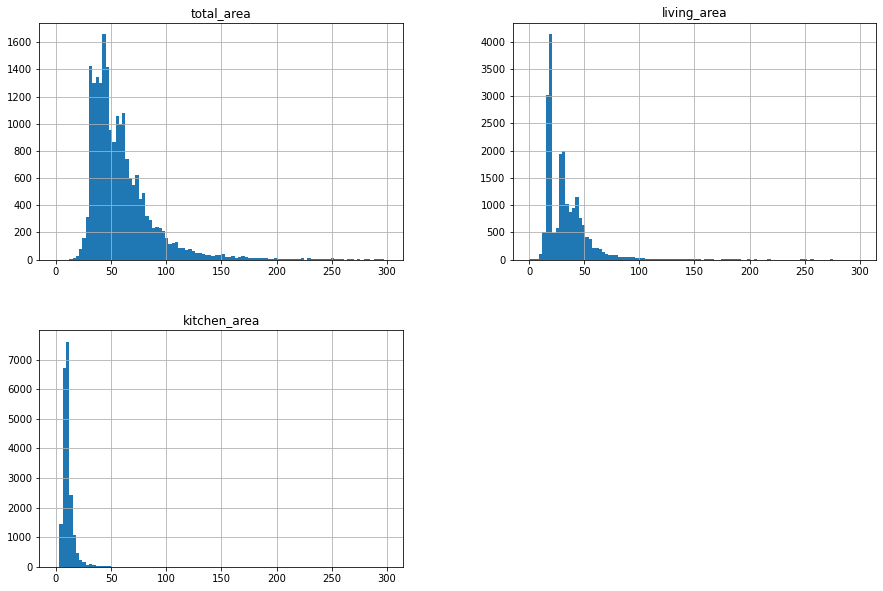

In [108]:
pd.DataFrame(data.loc[:,['total_area',
                         'living_area',
                         'kitchen_area',
                        ]]).hist(bins = 100,
                                 range=(0,300),
                                 figsize=(15, 10));

Построение гистрограмм для "цена объекта".

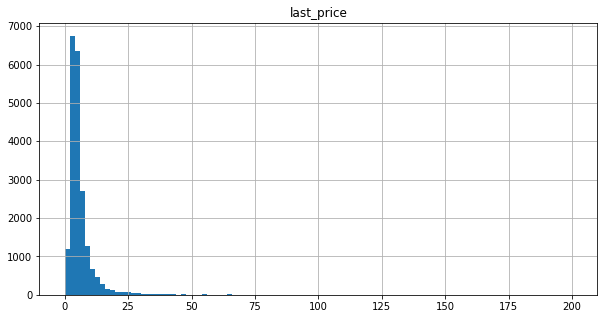

In [109]:
(
    pd.DataFrame(data.loc[:,['last_price']]
                 .hist(bins = 100,
                       range=(0,200),
                       figsize=(10, 5)))
);

Построение гистрограмм для "высота потолков".

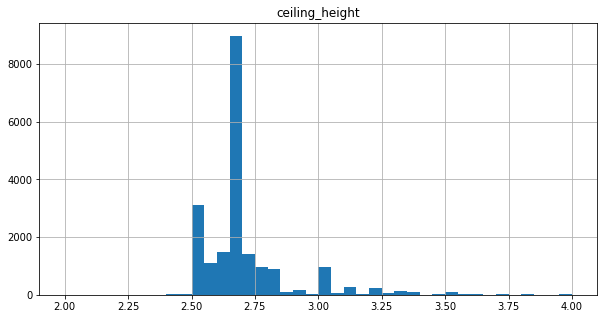

In [110]:
(
    pd.DataFrame(data.loc[:,['ceiling_height']])
    .hist(bins = 40, 
          range = (2,4),
          figsize=(10, 5))
);

Построение гистрограмм для "количество комнат".

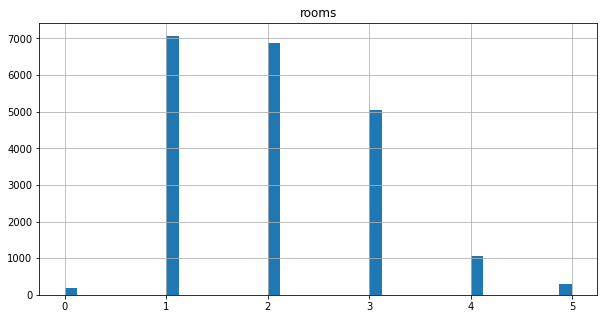

In [111]:
(
    pd.DataFrame(data.loc[:,['rooms']])
    .hist(bins = 40, 
          figsize=(10, 5)
         )
);

Построение гистрограмм для "этаж квартиры" и "общее количество этажей в доме".

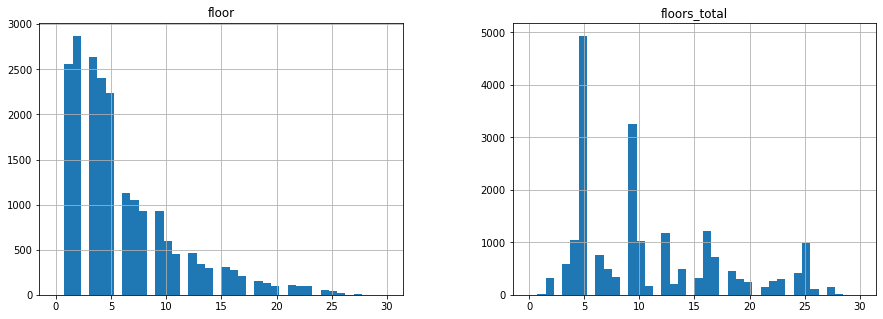

In [112]:
(
    pd.DataFrame(data.loc[:,['floor','floors_total']])
    .hist(bins = 40, 
          range = (0,30),
          figsize=(15, 5)
         )
);

Построение гистрограмм для "тип этажа квартиры".

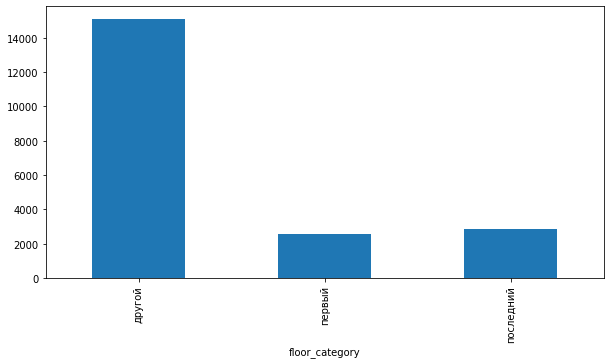

In [113]:
(
    data.groupby('floor_category')['floor_category']
    .count()
    .plot(kind='bar',
          figsize=(10,5))
);

Построение гистограммы расстояние до центра города в км

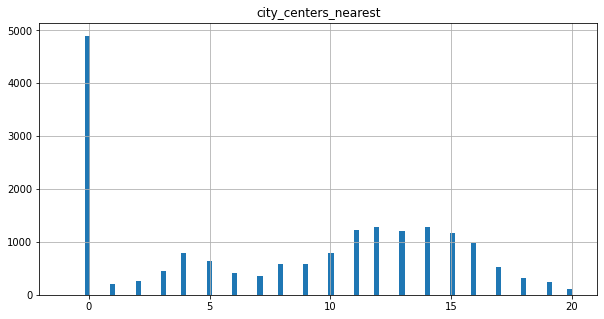

In [114]:
(
    pd.DataFrame(data.loc[:,['city_centers_nearest']])
    .hist(bins = 100, 
          range = (-1,20),
          figsize=(10, 5)
         )
);

Построение гистограммы расстояния до аэропортов в метрах

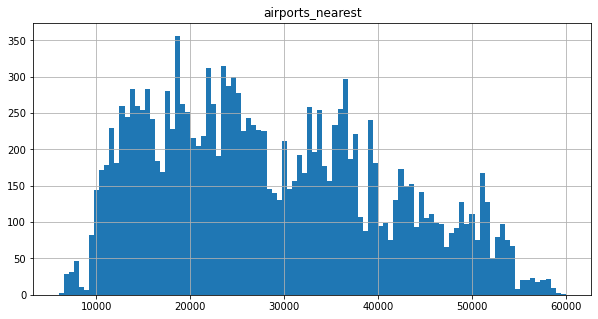

In [115]:
(
    pd.DataFrame(data.loc[:,['airports_nearest']])
    .hist(bins = 100, 
          range = (6000,60000),
          figsize=(10, 5)
         )
);

Построение гистограммы расстояния до парков в метрах

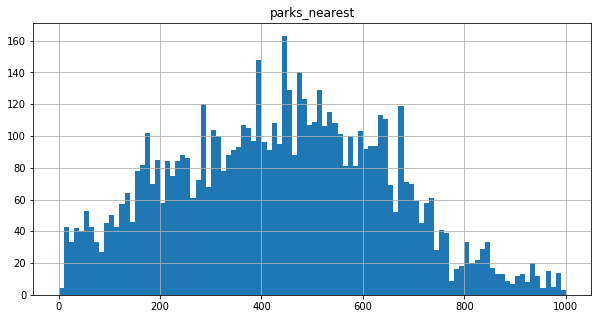

In [116]:
(
    pd.DataFrame(data.loc[:,['parks_nearest']])
    .hist(bins = 100, 
          range = (0,1000),
          figsize=(10, 5)
         )
);

Построение гистрограмм  "день и месяц публикации".

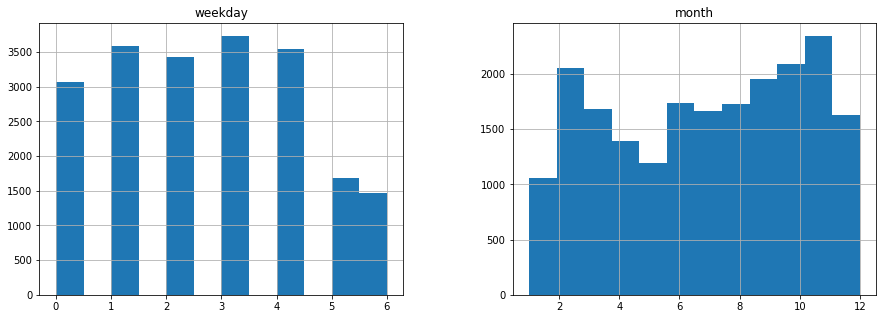

In [117]:
(
    pd.DataFrame(data.loc[:,['weekday','month']])
    .hist(bins = 12, 
          #range = (0,12),
          figsize=(15, 5)
         )
);

**Вывод:**
- общая площадь: продаются квартиры в с площадью от 20 до 200 м2
- жилая площадь:  продаются квартиры в с площадью от 10 до 100 м2
- площадь кухни: продаются квартиры в с площадью от 5 до 20 м2
- цена объекта : лежит в основном в пределах от 0,1*10^7 до 2*10^7. Наибольшее кол-во квартир продается в диапазоне от 0,25*10^7 до 0,75*10^7. Максимальная кол-во с стоимостью ориентировчно  0,37*10^7.
- количество комнат: большего всего объявлений однокомнатных квартир и двухкомнатных.  
- высота потолков; в оновном 2,7 м
- этаж квартиры: в основном покупают квартиры на 2-5 этажах
- тип этажа квартиры («первый», «последний», «другой»): преобладают квартиры в каетгории "другой"
- общее количество этажей в доме в оснвоном продаются кварри в домах с 5 и 10 этажами
- расстояние до центра города в км: основная масса квартир находится рядом с центров на расстоянии до 20км, но наблюдается большой всплеск квартир которые находятся далеко от центра без указания конкретного значения. Такое кол-во составляет практически 4800
- расстояние до ближайшего аэропорта: основная масса квартир находится рядом с аэропортами на расстоянии от 6км до 60км
- расстояние до ближайшего парка: основная масса квартир находится рядом с парками на расстоянии до 1км
- день и месяц публикации объявления: по будням выклыдвают и чаще все по вторник и четвергам. А по месяца февраль, октябрь и ноябрь.

**2.	Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.**
- Построим гистограмму.

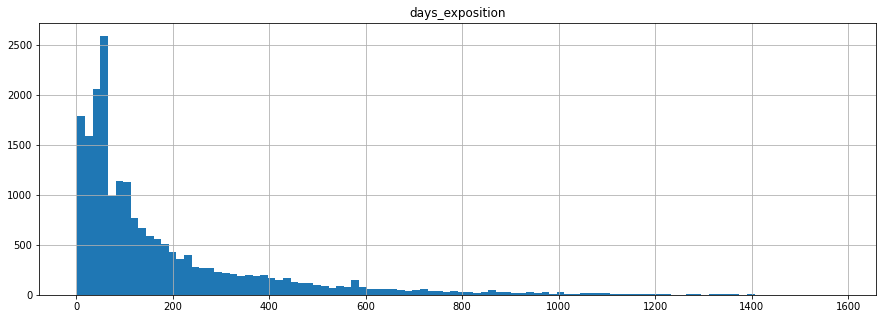

In [118]:
pd.DataFrame(data.loc[:,'days_exposition']).hist(bins = 100, figsize=(15, 5));

- Посчитаем среднее и медиану.

In [119]:
data['days_exposition'].apply(['mean','median']) 

mean      183.744051
median     99.000000
Name: days_exposition, dtype: float64

Построим сводную таблицу для наблюдения как менялось среднее и медианнное значение с годами у разных категорий местности

In [120]:
data.pivot_table(
    index = 'year',
    columns ='locality_category',
    values = 'days_exposition',
    aggfunc = ['mean','median']).T

year                                2014        2015        2016        2017  \
       locality_category                                                       
mean   город                  897.385246  647.927308  319.342894  155.713716   
       деревня               1040.666667  651.340909  373.550000  151.744063   
       посёлок               1015.214286  603.688889  312.488636  164.132385   
       садовое товарищество          NaN         NaN   26.000000  307.000000   
       село                          NaN         NaN  431.000000  179.600000   
median город                  869.500000  581.500000  233.000000  102.000000   
       деревня               1078.000000  605.000000  297.000000  102.000000   
       посёлок               1063.500000  524.000000  211.000000  107.000000   
       садовое товарищество          NaN         NaN   26.000000  307.000000   
       село                          NaN         NaN  421.000000   75.000000   

year                               2018  
       locality_category                 
mean   город                  90.681929  
       деревня                91.301242  
       посёлок                90.588551  
       садовое товарищество         NaN  
       село                  103.666667  
median город                  64.000000  
       деревня                60.000000  
       посёлок                62.000000  
       садовое товарищество         NaN  
       село                   72.500000

Построим сводную таблицу для наблюдения как менялось кол-во объявлений с годами у разных категорий местности

In [121]:
data.pivot_table(
    index = 'year',
    columns ='locality_category',
    values = 'days_exposition',
    aggfunc = ['count']).T

year                         2014    2015    2016    2017    2018
      locality_category                                          
count город                 122.0  1018.0  2336.0  6766.0  6967.0
      деревня                 6.0    44.0   120.0   379.0   322.0
      посёлок                 7.0    90.0   264.0   914.0  1118.0
      садовое товарищество    NaN     NaN     2.0     1.0     NaN
      село                    NaN     NaN     3.0    15.0    12.0

**Вывод:**
Основаня масса квартир в 2014-2018 год продавались за 99 дней
Однако время от момента формирования объявления о продаже и самой продажей квартиры уменьшилось в 2019 году основном. Но в тоже самое время до 2018 шел рост объявлений. Следовательно с 2014 по 2018 активно шел спрос на покупку квартир.

**3.	Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучим, зависит ли цена от:**
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

**Построим графики, которые покажут зависимость цены от указанных выше параметров**

Корреляция last_price c total_area:  0.6903372400080209
Корреляция last_price c living_area:  0.5381523604537
Корреляция last_price c kitchen_area:  0.47660475686257053


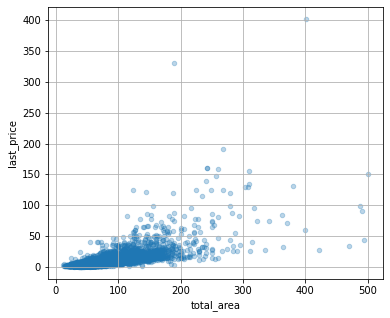

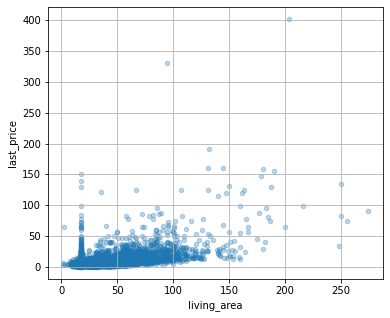

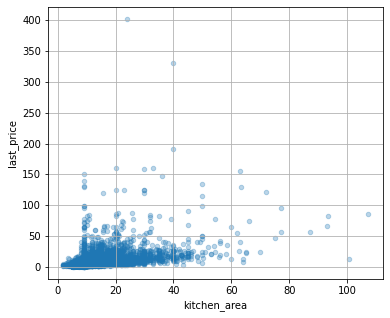

In [122]:
x = ['total_area','living_area','kitchen_area']
for i in x:
    data.plot(x=i,
          y= 'last_price',
          kind='scatter',
          figsize=(6, 5),
          grid=True,
          alpha=0.3);
    print(f'Корреляция last_price c {i}: ',data['last_price'].corr(data[i]))

Оценка стоимости квартир от 'floor_category', 'rooms','weekday','month','year' будем производить с помощью оценки средней цены за объект.

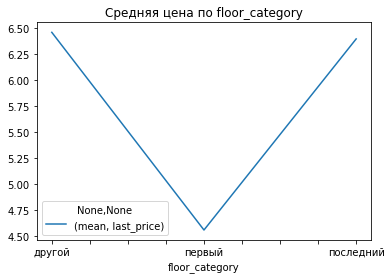

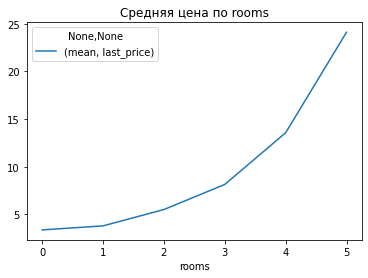

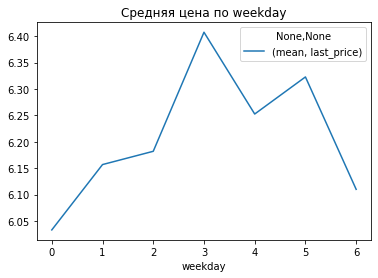

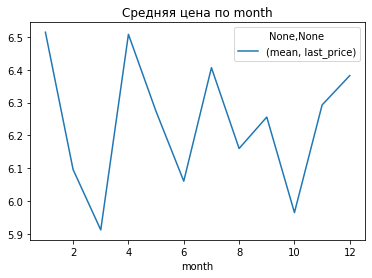

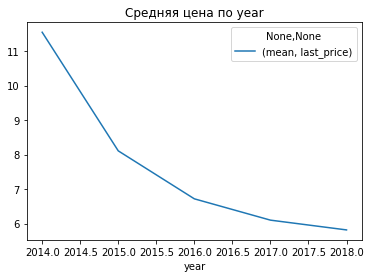

In [123]:
for i in ['floor_category', 'rooms','weekday','month','year']:
    p = data.pivot_table(index=i, values='last_price', aggfunc=['mean'])
    p.plot()
    plt.title(f'Средняя цена по {i}') 
    plt.show()

In [124]:
#data.plot(x='floor_category',
#          y='last_price',
#          kind='scatter',
#          figsize=(6, 5),
#          grid=True,
#          alpha=0.3);

 **Вывод:**
Графикам можно сделать вывод , что с ростом общей площади, жилой площади, площади кухни, количества комнат увеличивается стоимость квартиры.
    
Цены у квартир расположенных на пером этаже  в среднем 4,6 млн, на всех остальных приблизительно одинаковая ценае.
Влияние даты размещения (
- день недели - по четвергам в среднем больше цена. 
- месяц - Наиболее выгодные по продажам январь февраль июль. Не выгодны март и октябрь.
- год . С годами цена на квартиры падает. Наиболее выгодный был 2014 год


**4.	Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.**

Сгруппируем данные

In [125]:
locality_top = (
    data.pivot_table(index = 'locality_name', 
                     values = 'price_m2', 
                     aggfunc = ['count','mean'])
)


In [126]:
#locality_top 

In [127]:
#Переименуем названия столбцов
locality_top.columns = ['count','mean']
#locality_top

In [128]:
#Остортируем по убыванию кол-ва объявлений и выведим первые 10 строк
locality_top = locality_top.sort_values(by = 'count', 
                                        ascending=False).reset_index().head(10)
locality_top

,locality_name,count,mean
0,Санкт-Петербург,13479,0.113093
1,посёлок Мурино,527,0.085558
2,посёлок Шушары,406,0.077827
3,Всеволожск,362,0.068384
4,Пушкин,329,0.102994
5,Колпино,303,0.074698
6,посёлок Парголово,300,0.089624
7,деревня Кудрово,299,0.092474
8,Гатчина,270,0.068270
9,Выборг,206,0.056910


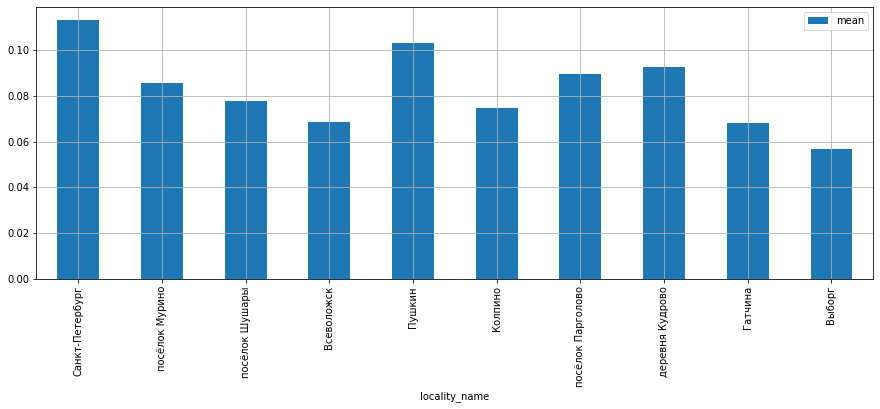

In [129]:
#Построение гистограммы для визуализации данных
locality_top.plot(kind = 'bar', 
                  x = 'locality_name', 
                  y='mean',
                  grid=True, 
                  figsize=(15,5));

**Вывод:**
Наибольшая средняя цена за м2 в Санкт-Петербурге.
Наименьшая цена в Выборге.

**5.	Ранее посчитано расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.**

In [130]:
data['price_km'] = data['last_price']/data['city_centers_nearest']
#data.head(10)

In [131]:
km_city = (
    data.
    loc[(data['locality_name'] == 'Санкт-Петербург'),
        ['city_centers_nearest','price_km']]
    .sort_values('city_centers_nearest')
)
#km_city

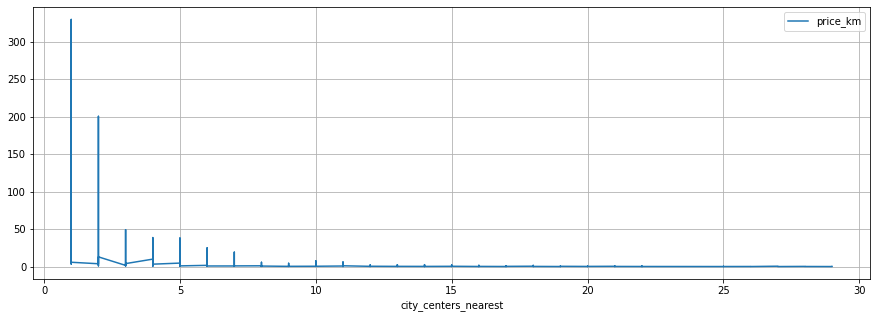

In [132]:
km_city.plot(x = 'city_centers_nearest', y = 'price_km', grid=True, figsize=(15,5));

**Вывод:**
С отдалением от центра цена за 1 км юудет падать. Наиболее дорого обходятся квартиры за первые 2 км.

### Общий вывод

**Была проведена предобработка данных в датасете.**

Пропуски обнаружились в столбцах:


| Наименование столбца  | Кол-во пустых строк | Процент пустых строк |
| :---                  | :----               | :---    |
| is_apartment          | 20924               | 88.290645 |
| parks_nearest         | 15620               | 65.909954 |
| ponds_nearest         | 14589               | 61.559559 |
| balcony               | 11519               | 48.605426 |
| ceiling_height        | 9195                | 23.384953 |
| airports_nearest      | 5542                | 23.384953 |
| city_centers_nearest  | 5519                | 23.287902 |
| ponds_around_3000     | 5518                | 23.283683 |
| parks_around_3000     | 5518                | 23.283683 |
| days_exposition       | 3181                | 13.422507 |
| kitchen_area          | 2278                | 9.612220 |
| living_area           | 1903                | 8.029875 |
| floors_total          | 86                  | 0.362885 |
| locality_name         | 49                  | 0.206760 |



- 23699 - всего строк в датасете

- 20506 - после предобработки осталось

86.5 % данных оставили от изначальных. Следовательно было потеряно менее ориентировочно 13,5%. 

В основном причиной всех пропусков является человечечский фактор. К примеру, если человек ошибся при вводе или не знал какие указывать данные или забыл их указать или посчитал, что нет смысла их укзаывать, так как уже указал в соседниз пунктах ответ. Все данные пустоты можно было восстановить.

Из данных столбцов выделяется **days_exposition**. Замечено, что кол-во пропусков с годами растет и в 2019г начинает преобладать над заполненными. Принято решение ислючить 2019г объявления из исследования, так как восстановить сложно и восстановление приведет к достаточно сильным искажениям. Природа данных пропусков не ясна. Возможно техническая ошибка.



**Была проведено исследование данных в датасете за 2014-2018г**

1. Изучены и описаны следующие параметры:

- общая площадь: продаются квартиры в с площадью от 20 до 200 м2
- жилая площадь:  продаются квартиры в с площадью от 10 до 100 м2
- площадь кухни: продаются квартиры в с площадью от 5 до 20 м2
- цена объекта : лежит в основном в пределах от 10 млн до 20 млн. Наибольшее кол-во квартир продается в диапазоне от 2,5 до 7,5млн. Максимальная кол-во с стоимостью ориентировчно  3,7 млн.
- количество комнат: большего всего объявлений однокомнатных квартир и двухкомнатных.  
- высота потолков; в оновном 2,7 м
- этаж квартиры: в основном покупают квартиры на 2-5 этажах
- тип этажа квартиры («первый», «последний», «другой»): преобладают квартиры в каетгории "другой"
- общее количество этажей в доме в оснвоном продаются кварри в домах с 5 и 10 этажами
- расстояние до центра города в км: основная масса квартир находится рядом с центров на расстоянии до 20км, но наблюдается большой всплеск квартиры который находится далеко от центра квартиры без указания конкретного значения. Такое кол-во составляет практически 4800
- расстояние до ближайшего аэропорта: основная масса квартир находится рядом с аэропортами на расстоянии от 6км до 60км
- расстояние до ближайшего парка: основная масса квартир находится рядом с парками на расстоянии до 1км
- день и месяц публикации объявления: по будням выклыдвают и чаще все по вторник и четвергам. А по месяца февраль, октябрь и ноябрь.



2. Какие факторы больше всего влияют на общую (полную) стоимость объекта?

С ростом общей площади, жилой площади, площади кухни,количества комнат увеличивается стоимость квартиры.
    
Цены у квартир расположенных на пером этаже  в среднем 4,6 млн, на всех остальных приблизительно одинаковая ценае.
Влияние даты размещения (
- день недели - по четвергам в среднем больше цена. 
- месяц - Наиболее выгодные по продажам январь февраль июль. Не выгодны март и октябрь.
- год . С годами цена на квартиры падает. Наиболее выгодный был 2014 год


3. Как быстро продавались квартиры.

Квартиры продавались в основном за 99 дней


4. Рассчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.


| Наименование       | Кол-во объявлений | Цена 1 м2 |
| :---               | :----             | :---    |
| Санкт-Петербург    | 13479             | 113093.238972 |
| посёлок Мурино     | 527               | 85557.665036 |
| посёлок Шушары     | 406               | 77826.896087 |
| Всеволожск         | 362               | 68384.088711 |
| Пушкин             | 329               | 102994.144158 |
| Колпино            | 303               | 74697.799096 |
| посёлок Парголово  | 300               | 89623.605137 |
| деревня Кудрово    | 299               | 92473.547576 |
| Гатчина            | 270               | 68269.891489 |
| Выборг             | 206               | 13.56909.579201 |



Наибольшая средняя цена за м2 в Санкт-Петербурге. Наименьшая цена в Выборге.



5. Зависимость стоимости объектов от расстояния до центра города

С отдалением от центра цена за 1 км юудет падать. Наиболее дорого обходятся квартиры за первые 2 км. Стоят они от 200-300 млн
